In [1]:
import sys
sys.path.append('../')
import os
os.environ['DATABASE_URL'] = DATABASE_URL = 'sqlite:////Users/nickhilton/kaggle/march_madness/databases/terrapin.db'
DATABASE = os.environ['DATABASE_URL'].split('sqlite:///')[1]

import pandas as pd
from helpers import sqlite_to_df
from matplotlib import pyplot as plt

In [2]:
# Regular Imports
from datetime import datetime
import pandas as pd
import numpy as np
import warnings

# Matplotlib imports 
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import set_matplotlib_formats
import matplotlib

# Formatters for matplotlib
from matplotlib.ticker import StrMethodFormatter



# Options
pd.set_option('display.max_rows',200)
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.notebook_repr_html', True)


%matplotlib inline
plt.rcParams['figure.dpi'] = 100
set_matplotlib_formats('pdf', 'png')
matplotlib.rcParams['figure.figsize'] = (4.5,2.7)
matplotlib.rcParams["legend.fontsize"] = 7
matplotlib.rcParams['font.size'] = 7
#%%
# Formatters and Display Functions
IT_FORMATTER = StrMethodFormatter('{x:,.0f}')

def get_float_formatter(n=1):
    return StrMethodFormatter(f'{{x:.{n}f}}')
FLOAT_FORMATTER = get_float_formatter()

INT_FORMATTER = StrMethodFormatter("{x:,g}")
INT_FORMAT_STRING = '{:,g}'

PERCENT_FORMATTER = StrMethodFormatter("{x:,.0%}")
PERCENT_FORMAT_STRING = '{:,.1%}'

/var/folders/51/f34q3vy907ggv81__1wckfyc0000gn/T/ipykernel_32977/257400200.py:26: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'png')


In [3]:
# Get evaluations into a df for analysis

df = sqlite_to_df('SELECT * from evaluations').dropna()

In [4]:
df.head()

,id,rating,d,k,seed,link,FGP,R,FGP3,season,tournament_log_loss,correct_predictions
0,1_25_-35_N_1200_15_-10_2010_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2010,0.240932,0.761905
1,1_25_-35_N_1200_15_-10_2011_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2011,0.227266,0.777778
2,1_25_-35_N_1200_15_-10_2012_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2012,0.223905,0.857143
3,1_25_-35_N_1200_15_-10_2013_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2013,0.241202,0.777778
4,1_25_-35_N_1200_15_-10_2014_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2014,0.222456,0.761905


In [5]:
df.columns

Index(['id', 'rating', 'd', 'k', 'seed', 'link', 'FGP', 'R', 'FGP3', 'season',
       'tournament_log_loss', 'correct_predictions'],
      dtype='object')

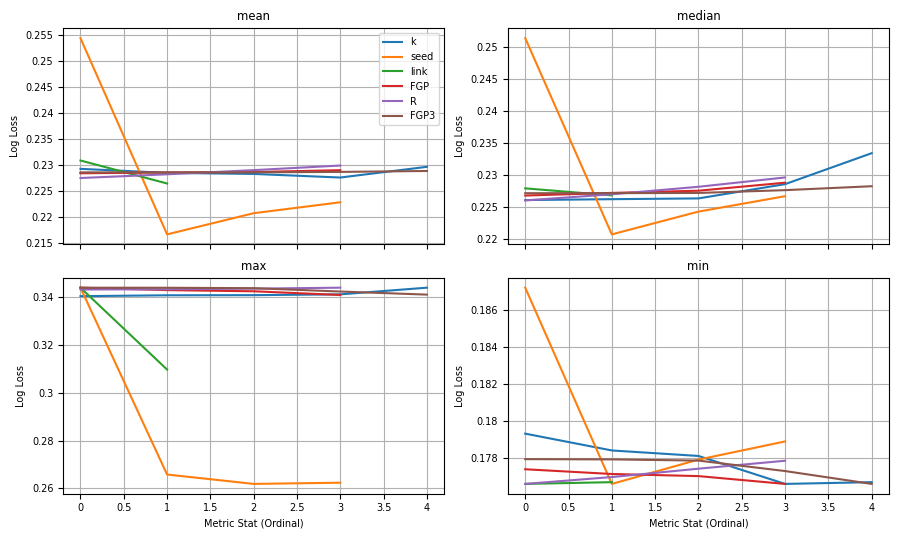

In [7]:
# Subplots
fig, axes = plt.subplots(2,2)
axes = axes.flatten()

# Resize to accomodate more figures
matplotlib.rcParams['figure.figsize'] = (9,5.4)

stats = ['mean', 'median', 'max', 'min']
params = ['k', 'seed', 'link', 'FGP', 'R', 'FGP3']

for ix, stat in enumerate(stats):
    ax = axes[ix]
    
    for col in params:
        stats_df = df.groupby(by=[col]).tournament_log_loss.agg(stats)
        ax.plot(stats_df[stat].sort_index().reset_index(drop=True), label=col)
        
    plt.draw()

    ax.set_title(stat)

    ax.set_xlabel("Metric Stat (Ordinal)")
    ax.set_ylabel("Log Loss")
    
    ax.xaxis.set_major_formatter(INT_FORMATTER)
    ax.yaxis.set_major_formatter(INT_FORMATTER)

#     # Only show some tick labels
#     xticks = list(ax.get_xticks())
#     xlabels = list(ax.get_xticklabels())
#     n = 5
#     ax.set_xticks(xticks[::n])
#     ax.set_xticklabels(xlabels[::n])
#     ax2.set_xticks(xticks[::n])
#     ax2.set_xticklabels(xlabels[::n])
    
#     ax.tick_params(axis='x', rotation=45)
    
#     # Now plot on secondary axis
#     ax2.plot(df["death_rate"], alpha=0.4, c='g', linestyle='dashed', label='death_rate')
#     ax2.plot(df["recovered_rate"], alpha=0.4, c='r', linestyle='dashed', label='recovered_rate')

    # Show grid on major axis
    ax.grid()
    
#     # Show secondary legend
#     if ix == 1:
#         ax2.legend(loc=0)
    if ix == 0:
        ax.legend(loc=0)
    
    # Get rid of x labels if chart in upper area
    if ix < 2:
        ax.set_xticklabels([])
#         ax2.set_xticklabels([])
        ax.set_xlabel("")
        
#     # Show horizontal line
#     ax2.axhline(y=0.01, c='black', alpha = 0.9)
    
#     # Set axes limits
#     ax2.set_ylim(0,0.05)
    
    # Add spacing between subplots to show axes more clearly
    plt.tight_layout()


In [8]:
df.head()

,id,rating,d,k,seed,link,FGP,R,FGP3,season,tournament_log_loss,correct_predictions
0,1_25_-35_N_1200_15_-10_2010_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2010,0.240932,0.761905
1,1_25_-35_N_1200_15_-10_2011_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2011,0.227266,0.777778
2,1_25_-35_N_1200_15_-10_2012_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2012,0.223905,0.857143
3,1_25_-35_N_1200_15_-10_2013_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2013,0.241202,0.777778
4,1_25_-35_N_1200_15_-10_2014_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2014,0.222456,0.761905


In [9]:
df.groupby(by="season").tournament_log_loss.agg(stats)

,mean,median,max,min
season,,,,
2010,0.234780,0.233290,0.284332,0.210618
2011,0.217997,0.215243,0.255579,0.197155
2012,0.210641,0.210659,0.233498,0.186131
2013,0.241986,0.239743,0.281513,0.225056
2014,0.230263,0.219928,0.286861,0.211972
2015,0.197947,0.193635,0.238899,0.176711
2016,0.252014,0.240252,0.330114,0.228421
2017,0.237725,0.230792,0.287716,0.220066
2018,0.257322,0.236485,0.344049,0.229191


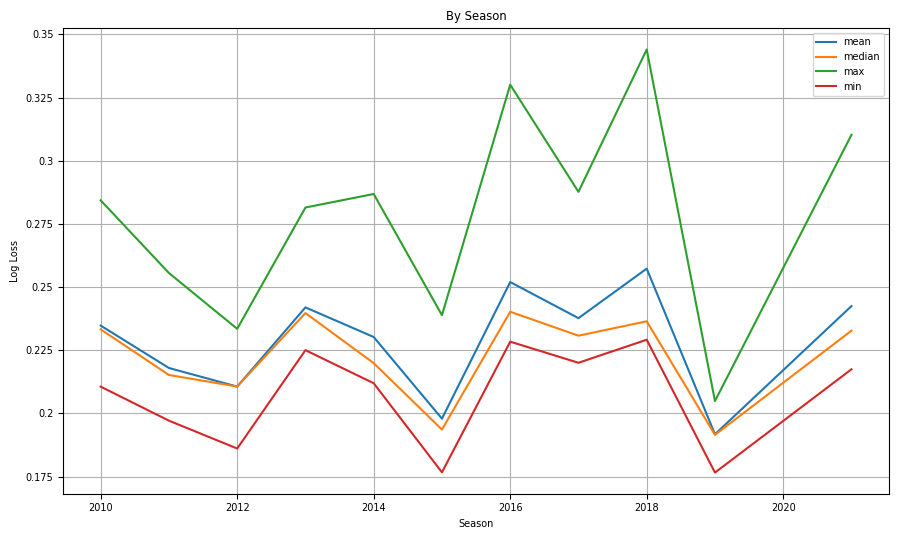

In [10]:
# Subplots
fig, ax = plt.subplots(1,1)
axes = axes.flatten()

# Resize to accomodate more figures
matplotlib.rcParams['figure.figsize'] = (9,5.4)

stats = ['mean', 'median', 'max', 'min']
years = list(range(2003,2022))

stats_df = df.groupby(by="season").tournament_log_loss.agg(stats)

for ix, stat in enumerate(stats):
    
    ax.plot(stats_df[stat].sort_index(), label=stat)
        
#     plt.draw()

ax.set_title("By Season")

ax.set_xlabel("Season")
ax.set_ylabel("Log Loss")

#     ax.xaxis.set_major_formatter(INT_FORMATTER)
ax.yaxis.set_major_formatter(INT_FORMATTER)

#     # Only show some tick labels
# xticks = list(ax.get_xticks())
# xlabels = list(ax.get_xticklabels())
# n = 2
# ax.set_xticks(xticks[::n])
# ax.set_xticklabels(xlabels[::n])
#     ax2.set_xticks(xticks[::n])
#     ax2.set_xticklabels(xlabels[::n])

#     ax.tick_params(axis='x', rotation=45)

#     # Now plot on secondary axis
#     ax2.plot(df["death_rate"], alpha=0.4, c='g', linestyle='dashed', label='death_rate')
#     ax2.plot(df["recovered_rate"], alpha=0.4, c='r', linestyle='dashed', label='recovered_rate')

# Show grid on major axis
ax.grid()

#     # Show secondary legend
#     if ix == 1:
#         ax2.legend(loc=0)

ax.legend(loc=0)

# # Get rid of x labels if chart in upper area
# if ix < 2:
#     ax.set_xticklabels([])
# #         ax2.set_xticklabels([])
#     ax.set_xlabel("")

#     # Show horizontal line
#     ax2.axhline(y=0.01, c='black', alpha = 0.9)

#     # Set axes limits
#     ax2.set_ylim(0,0.05)

# Add spacing between subplots to show axes more clearly
plt.tight_layout()



In [11]:
# Get evaluations into a df for analysis

df = sqlite_to_df('SELECT * from evaluations').dropna()

In [12]:
df.head()

,id,rating,d,k,seed,link,FGP,R,FGP3,season,tournament_log_loss,correct_predictions
0,1_25_-35_N_1200_15_-10_2010_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2010,0.240932,0.761905
1,1_25_-35_N_1200_15_-10_2011_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2011,0.227266,0.777778
2,1_25_-35_N_1200_15_-10_2012_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2012,0.223905,0.857143
3,1_25_-35_N_1200_15_-10_2013_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2013,0.241202,0.777778
4,1_25_-35_N_1200_15_-10_2014_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2014,0.222456,0.761905


In [15]:
df.groupby(by=params).agg({"tournament_log_loss":"mean"}).sort_values(
    by="tournament_log_loss", ascending=True).head(50)

tournament_log_loss
k  seed  link FGP    R    FGP3                        
80 -70.0 N    1200.0 15.0  500.0              0.213633
                           50.0               0.213636
                           0.0                0.213640
                          -10.0               0.213641
              1600.0 15.0  50.0               0.213691
                           0.0                0.213693
                          -10.0               0.213693
              1200.0 15.0  1000.0             0.213699
              1600.0 15.0  500.0              0.213709
              1800.0 15.0  50.0               0.213729
                           0.0                0.213730
                          -10.0               0.213730
                           500.0              0.213757
              1600.0 15.0  1000.0             0.213797
              1800.0 15.0  1000.0             0.213857
              2500.0 15.0 -10.0               0.213914
                           0.0                0.213915
                           50.0               0.213918
                           500.0              0.213982
                           1000.0             0.214121
              1200.0 20.0  500.0              0.214139
                           50.0               0.214141
                           0.0                0.214145
                          -10.0               0.214146
45 -70.0 N    1600.0 15.0 -10.0               0.214196
                           0.0                0.214196
                           50.0               0.214199
              1800.0 15.0 -10.0               0.214200
                           0.0                0.214201
80 -70.0 N    1200.0 20.0  1000.0             0.214205
45 -70.0 N    1800.0 15.0  50.0               0.214205
80 -70.0 N    1600.0 20.0  50.0               0.214206
45 -70.0 N    1200.0 15.0 -10.0               0.214208
                           0.0                0.214208
80 -70.0 N    1600.0 20.0  0.0                0.214208
                          -10.0               0.214208
45 -70.0 N    1200.0 15.0  50.0               0.214208
80 -70.0 N    1600.0 20.0  500.0              0.214225
              1800.0 20.0  50.0               0.214250
                           0.0                0.214250
                          -10.0               0.214250
45 -70.0 N    1200.0 15.0  500.0              0.214251
              1600.0 15.0  500.0              0.214263
              2500.0 15.0 -10.0               0.214268
                           0.0                0.214270
                           50.0               0.214279
80 -70.0 N    1800.0 20.0  500.0              0.214279
45 -70.0 N    1800.0 15.0  500.0              0.214280
80 -70.0 N    1600.0 20.0  1000.0             0.214313
40 -70.0 N    1800.0 15.0 -10.0               0.214347

In [146]:
df.groupby(by=params).agg({"tournament_log_loss":"median"}).sort_values(
    by="tournament_log_loss", ascending=True).head(100)

tournament_log_loss
k  seed  link FGP    R    FGP3                       
36 -50.0 N    2000.0 0.0   0.0               0.270020
                     15.0  0.0               0.270031
                     20.0  0.0               0.270034
                     25.0  0.0               0.270038
                     30.0  0.0               0.270041
41 -50.0 N    2000.0 15.0  0.0               0.270198
                     20.0  0.0               0.270202
                     25.0  0.0               0.270205
                     30.0  0.0               0.270209
36 -32.0 L    2000.0 0.0   0.0               0.270530
                     15.0  0.0               0.270550
                     20.0  0.0               0.270557
                     25.0  0.0               0.270564
                     30.0  0.0               0.270570
41 -32.0 L    2000.0 15.0  0.0               0.270850
                     20.0  0.0               0.270857
                     25.0  0.0               0.270864
                     30.0  0.0               0.270871
36 -50.0 N    1000.0 0.0   0.0               0.271173
                     15.0  0.0               0.271183
                     20.0  0.0               0.271186
                     25.0  0.0               0.271189
                     30.0  0.0               0.271193
25 -40.0 N    1800.0 20.0 -100.0             0.271274
                          -10.0              0.271319
41 -50.0 N    1000.0 15.0  0.0               0.271330
                     20.0  0.0               0.271333
                     25.0  0.0               0.271337
                     30.0  0.0               0.271340
25 -40.0 N    1800.0 20.0  50.0              0.271350
40 -40.0 N    1800.0 20.0 -100.0             0.271372
                          -10.0              0.271427
36 -32.0 N    2000.0 0.0   0.0               0.271449
                     15.0  0.0               0.271461
25 -40.0 N    1600.0 20.0 -100.0             0.271463
36 -32.0 N    2000.0 20.0  0.0               0.271464
40 -40.0 N    1800.0 20.0  50.0              0.271464
36 -32.0 N    2000.0 25.0  0.0               0.271468
                     30.0  0.0               0.271472
45 -40.0 N    1800.0 20.0 -100.0             0.271475
25 -40.0 N    1600.0 20.0 -10.0              0.271507
36 -32.0 L    1000.0 0.0   0.0               0.271524
45 -40.0 N    1800.0 20.0 -10.0              0.271533
25 -40.0 N    1600.0 20.0  50.0              0.271537
36 -32.0 L    1000.0 15.0  0.0               0.271544
40 -40.0 N    1600.0 20.0 -100.0             0.271545
36 -32.0 L    1000.0 20.0  0.0               0.271550
                     25.0  0.0               0.271556
                     30.0  0.0               0.271563
45 -40.0 N    1800.0 20.0  50.0              0.271573
40 -40.0 N    1600.0 20.0 -10.0              0.271599
41 -32.0 N    2000.0 15.0  0.0               0.271615
                     20.0  0.0               0.271619
                     25.0  0.0               0.271623
                     30.0  0.0               0.271627
40 -40.0 N    1600.0 20.0  50.0              0.271636
45 -40.0 N    1600.0 20.0 -100.0             0.271645
                          -10.0              0.271701
                           50.0              0.271740
41 -32.0 L    1000.0 15.0  0.0               0.271806
                     20.0  0.0               0.271812
                     25.0  0.0               0.271819
                     30.0  0.0               0.271825
36 -50.0 N    500.0  0.0   0.0               0.271827
                     15.0  0.0               0.271836
                     20.0  0.0               0.271839
                     25.0  0.0               0.271842
                     30.0  0.0               0.271845
25 -40.0 N    1200.0 20.0 -100.0             0.271867
              1800.0 25.0 -100.0             0.271887
   -35.0 N    1800.0 20.0 -100.0             0.271893
40 -40.0 N    1800.0 25.0 -100.0             0.271905
25 -40.0 N    1200.0 20.0 -10.0       

In [14]:
df.groupby(by=params).agg({"tournament_log_loss":"min"}).sort_values(
    by="tournament_log_loss", ascending=True).head(10)

tournament_log_loss
k   seed  link FGP    R    FGP3                       
80  -70.0 L    2500.0 15.0 1000.0             0.176617
150 -70.0 N    2500.0 15.0 1000.0             0.176711
80  -70.0 L    2500.0 20.0 1000.0             0.176987
150 -70.0 N    1800.0 15.0 1000.0             0.177038
               2500.0 20.0 1000.0             0.177052
               1600.0 15.0 1000.0             0.177152
               2500.0 15.0 500.0              0.177311
               1800.0 20.0 1000.0             0.177330
               1200.0 15.0 1000.0             0.177407
               1600.0 20.0 1000.0             0.177428